## Tarea 1
### Diego Fernando Valle Morales - 20003022

In [258]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import multivariate_normal

In [128]:
datos = pd.read_csv("estaturas.csv", delimiter=';')
estaturas=datos.iloc[:,0]
#estaturas
edades=datos.iloc[:,1]
#edades
datos

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32
5,1.66,29
6,1.64,27
7,1.85,34
8,1.85,26
9,1.75,21


Implementando el algoritmo de K-Means

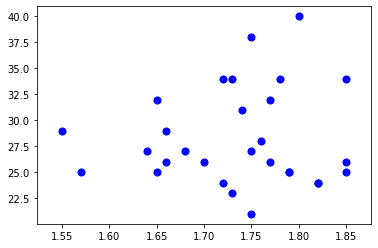

In [287]:
X = datos
y = edades

# Number of training data
n = X.shape[0]
# Number of features in the data
c = X.shape[1]


# Plot the data
colors=['orange', 'blue', 'green']
#print(X["Estatura"][0])
#for i in range(n):
    #print(X["Estatura"][i], X["Edad"][i])
    #print(y[i],int((y[i])))
plt.scatter(X["Estatura"], X["Edad"], s=50, color = "blue")

### K=3

50.75802610449453
0
1
2
2 : [1 0 1 0 0 2 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 2 1 1]
0
1
2
2 : [1 2 1 0 0 2 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 2 2 1]
0
1
2
2 : [1 2 1 0 2 2 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 2 2 1]
0
1
2
2 : [1 2 1 0 2 2 1 0 1 1 1 1 1 1 1 0 1 1 1 1 2 0 1 1 0 0 2 2 1]
0
1
2
2 : [1 2 1 0 2 2 1 0 1 1 1 1 1 1 1 0 1 1 1 1 2 0 1 1 0 0 2 2 1]


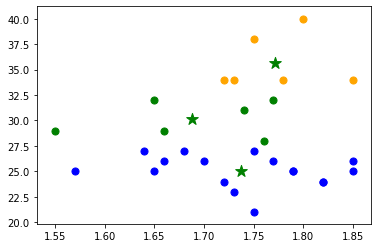

In [293]:
# Number of clusters
K = 3
# Number of training data
n = datos.shape[0]
# Number of features in the data
c = datos.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(datos, axis = 0)
std = np.std(datos, axis = 0)
centers = np.random.randn(K,c).dot(np.zeros([c,2])+std.values.reshape(2,1)) + np.zeros([K,c])+mean.values.reshape(1,2)

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

error = np.linalg.norm(centers_new - centers_old)
print(error)
# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(K):
        print(i)
        distances[:,i] = np.linalg.norm(datos - centers_new[i], axis=1)
    #print(distances)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    print(i,":",clusters)
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(datos[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    #print(error)
centers_new    
# array([[5.006     , 3.418     , 1.464     , 0.244     ],
#        [6.48787879, 2.96212121, 5.34242424, 1.87575758],
#        [5.82352941, 2.69705882, 4.05882353, 1.28823529]])

# Plot the data
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(X["Estatura"][i], X["Edad"][i], s=50, color = colors[clusters[i]])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

### K=4

57.35252835192962
0
1
2
3
3 : [3 1 3 1 1 1 1 2 3 0 3 3 3 3 3 1 3 3 3 1 1 2 3 3 2 1 1 1 1]
0
1
2
3
3 : [3 1 3 2 1 1 3 2 3 0 3 3 3 3 3 2 3 3 3 3 1 2 3 3 2 2 1 1 3]
0
1
2
3
3 : [3 1 3 2 1 1 3 2 3 0 0 3 3 3 3 2 3 3 3 3 1 2 3 3 2 2 1 1 3]
0
1
2
3
3 : [3 1 3 2 1 1 3 2 3 0 0 3 3 3 3 2 3 3 3 3 1 2 3 3 2 2 1 1 3]
CLUSTERS:  [3 1 3 2 1 1 3 2 3 0 0 3 3 3 3 2 3 3 3 3 1 2 3 3 2 2 1 1 3]


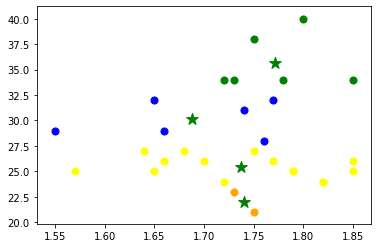

In [294]:
# Number of clusters
K = 4
# Number of training data
n = datos.shape[0]
# Number of features in the data
c = datos.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(datos, axis = 0)
std = np.std(datos, axis = 0)
centers = np.random.randn(K,c).dot(np.zeros([c,2])+std.values.reshape(2,1)) + np.zeros([K,c])+mean.values.reshape(1,2)

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

error = np.linalg.norm(centers_new - centers_old)
print(error)
# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(K):
        print(i)
        distances[:,i] = np.linalg.norm(datos - centers_new[i], axis=1)
    #print(distances)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    print(i,":",clusters)
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(datos[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    #print(error)
centers_new    
# array([[5.006     , 3.418     , 1.464     , 0.244     ],
#        [6.48787879, 2.96212121, 5.34242424, 1.87575758],
#        [5.82352941, 2.69705882, 4.05882353, 1.28823529]])

# Plot the data
print("CLUSTERS: ",clusters)
colors=['orange', 'blue', 'green', 'yellow']
for i in range(n):
    plt.scatter(X["Estatura"][i], X["Edad"][i], s=50, color = colors[clusters[i]])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

#### K=5

66.00197495138332
0
1
2
3
4
4 : [3 0 3 1 0 0 0 1 0 4 3 3 3 3 3 1 3 3 3 0 0 2 3 3 2 1 0 0 0]
0
1
2
3
4
4 : [3 0 3 1 1 0 0 1 3 4 3 3 3 3 3 1 3 3 3 0 1 2 3 3 2 1 0 0 0]
0
1
2
3
4
4 : [3 1 3 1 1 0 0 1 3 4 3 3 3 3 3 1 3 3 3 0 1 2 3 3 2 1 0 0 0]
0
1
2
3
4
4 : [3 1 3 1 1 0 0 1 3 4 3 3 3 3 3 1 3 3 3 0 1 2 3 3 2 1 0 0 0]
CLUSTERS:  [3 1 3 1 1 0 0 1 3 4 3 3 3 3 3 1 3 3 3 0 1 2 3 3 2 1 0 0 0]


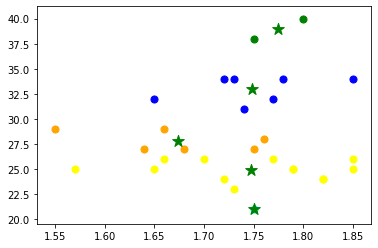

In [298]:
# Number of clusters
K = 5
# Number of training data
n = datos.shape[0]
# Number of features in the data
c = datos.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(datos, axis = 0)
std = np.std(datos, axis = 0)
centers = np.random.randn(K,c).dot(np.zeros([c,2])+std.values.reshape(2,1)) + np.zeros([K,c])+mean.values.reshape(1,2)

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

error = np.linalg.norm(centers_new - centers_old)
print(error)
# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(K):
        print(i)
        distances[:,i] = np.linalg.norm(datos - centers_new[i], axis=1)
    #print(distances)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    print(i,":",clusters)
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(datos[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    #print(error)
centers_new    
# array([[5.006     , 3.418     , 1.464     , 0.244     ],
#        [6.48787879, 2.96212121, 5.34242424, 1.87575758],
#        [5.82352941, 2.69705882, 4.05882353, 1.28823529]])

# Plot the data
print("CLUSTERS: ",clusters)
colors=['orange', 'blue', 'green', 'yellow', 'cyan']
for i in range(n):
    plt.scatter(X["Estatura"][i], X["Edad"][i], s=50, color = colors[clusters[i]])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

#### K=6

In [311]:
# Number of clusters
K = 6
# Number of training data
n = datos.shape[0]
# Number of features in the data
c = datos.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(datos, axis = 0)
std = np.std(datos, axis = 0)
centers = np.random.randn(K,c).dot(np.zeros([c,2])+std.values.reshape(2,1)) + np.zeros([K,c])+mean.values.reshape(1,2)

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

error = np.linalg.norm(centers_new - centers_old)
print(error)
# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(K):
        print(i)
        distances[:,i] = np.linalg.norm(datos - centers_new[i], axis=1)
    #print(distances)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    print(i,":",clusters)
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(datos[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    #print(error)
centers_new    

# Plot the data
print("CLUSTERS: ",clusters)
colors=['orange', 'blue', 'green', 'yellow', 'cyan', 'brown']
for i in range(n):
    plt.scatter(X["Estatura"][i], X["Edad"][i], s=50, color = colors[clusters[i]])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

61.69739187131097
0
1
2
3
4
5
5 : [3 4 5 4 4 3 3 4 3 2 5 3 5 3 3 4 3 3 3 3 4 4 3 5 4 4 3 3 3]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5
5 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
5 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
1
2
3
4
5


KeyboardInterrupt: 

#### K=7

77.14793536876684
0
1
2
3
4
5
6
6 : [1 0 5 6 0 3 3 6 1 5 5 4 5 4 4 6 1 4 1 3 0 2 4 5 2 6 3 3 3]
0
1
2
3
4
5
6
6 : [1 0 5 6 0 3 3 6 1 5 5 4 5 4 4 6 1 4 1 3 0 2 4 5 2 6 3 3 3]
CLUSTERS:  [1 0 5 6 0 3 3 6 1 5 5 4 5 4 4 6 1 4 1 3 0 2 4 5 2 6 3 3 3]


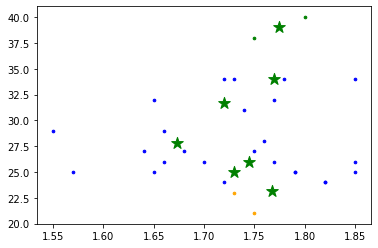

In [238]:
# Number of clusters
K = 7
# Number of training data
n = datos.shape[0]
# Number of features in the data
c = datos.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(datos, axis = 0)
std = np.std(datos, axis = 0)
centers = np.random.randn(K,c).dot(np.zeros([c,2])+std.values.reshape(2,1)) + np.zeros([K,c])+mean.values.reshape(1,2)

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

error = np.linalg.norm(centers_new - centers_old)
print(error)
# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(K):
        print(i)
        distances[:,i] = np.linalg.norm(datos - centers_new[i], axis=1)
    #print(distances)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    print(i,":",clusters)
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(datos[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    #print(error)
centers_new    
# array([[5.006     , 3.418     , 1.464     , 0.244     ],
#        [6.48787879, 2.96212121, 5.34242424, 1.87575758],
#        [5.82352941, 2.69705882, 4.05882353, 1.28823529]])

# Plot the data
print("CLUSTERS: ",clusters)
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(X["Estatura"][i], X["Edad"][i], s=7, color = colors[int((y[i]/12)-1)])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

### Implementando Soft Clustering

In [239]:
modelo1=KMeans()
modelo1.fit(datos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [240]:
print("K=",modelo1.n_clusters)

K= 8


#### K=3

In [241]:
modelo2=KMeans(n_clusters=3)
modelo2.fit(datos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [243]:
modelo2.predict(datos)

array([0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1,
       0, 0, 1, 2, 2, 0, 0])

#### K=4

In [244]:
modelo3=KMeans(n_clusters=4)
modelo3.fit(datos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [245]:
modelo3.predict(datos)

array([2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 3,
       0, 0, 3, 1, 2, 2, 2])

#### K=5

In [246]:
modelo4=KMeans(n_clusters=5)
modelo4.fit(datos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [247]:
modelo4.predict(datos)

array([1, 0, 1, 0, 0, 3, 3, 0, 1, 4, 4, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 2,
       1, 1, 2, 0, 3, 3, 3])

#### K=6

In [248]:
modelo5=KMeans(n_clusters=6)
modelo5.fit(datos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [249]:
modelo5.predict(datos)

array([1, 2, 1, 5, 2, 3, 3, 5, 1, 4, 4, 1, 1, 1, 1, 5, 1, 1, 1, 3, 2, 0,
       1, 1, 0, 5, 3, 3, 3])

#### K=7

In [250]:
modelo6=KMeans(n_clusters=7)
modelo6.fit(datos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [251]:
modelo6.predict(datos)

array([5, 6, 0, 1, 6, 3, 5, 1, 5, 4, 4, 0, 0, 0, 0, 1, 5, 0, 5, 5, 6, 2,
       0, 0, 2, 1, 3, 3, 5])

### Conclusión primera parte
SKlearn utiliza un algoritmo automatizado, que facilita la realización de la búsqueda y colocación de los centroides. Al igual que en el caso del hard-clustering, la aleatoriedad en la colocación del primer centroide puede provocar que se encicle al momento de realizar las diferentes iteraciones de ajuste del centroide.

En el caso del método del codo se podría utilizar para facilitar la elección del K (número de clústers), pero al usar soft-clustering se puede observar que es escogido de forma automática el valor de K=8, pero en los experimientos se usó valores que iban desde K=3, hasta K=7, siendo valores que en varios casos no representan de mejor manera la cantidad de clústers a utilizar. Por ser pocos datos y un poco dispersos hubiera apoyado en la decisión.

### Usando los datos de la segunda pestaña

In [253]:
datosvaltests=pd.read_csv("valtests.csv", delimiter=";")
datosvaltests

,Estatura,Edad
0,1.82,25
1,1.80,27
2,1.60,31
3,1.60,35
4,1.82,30
5,1.76,32
6,1.79,31
7,1.61,31


In [256]:
datosAnomalias=pd.read_csv("anomalias.csv", delimiter=";")
datosAnomalias

,Estatura,Edad
0,0.25,2.4
1,175.10,2.5
2,0.15,250.0
3,150.00,14.0


In [266]:
modeloGaussiano=multivariate_normal(mean=np.mean(datos.values, axis=0), cov=np.cov(datos.values.T))
x,y=np.meshgrid(np.linspace(datos.Estatura.min()-0.1, datos.Estatura.max()+0.1), 100)
zPDF=modeloGaussiano.pdf(np.dstack((x,y)))

In [270]:
def DetectaAnomalias(modeloGaussiano, observacion, ep=0.1):
    probabilidadAnomalia = modeloGaussiano.pdf(observacion)
    if probabilidadAnomalia<ep:
        print("Anomalia detectada")
        return 1
    else:
        print("Todo en orden")
        return 0

In [271]:
observacion=datos.sample(1).values
print("Dato de control: ", observacion)
DetectaAnomalias(modeloGaussiano, observacion)

Dato de control:  [[ 1.82 24.  ]]
Todo en orden


0

#### Aplicando datos del dataset valtests

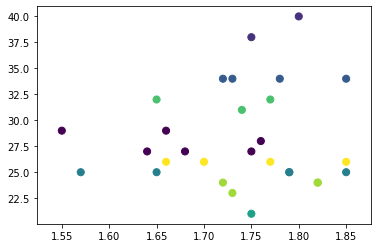

In [283]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=8).fit(datos)
labels=gmm.predict(datos)
plt.scatter(datos["Estatura"], datos["Edad"], c=labels, s=50, cmap="viridis")

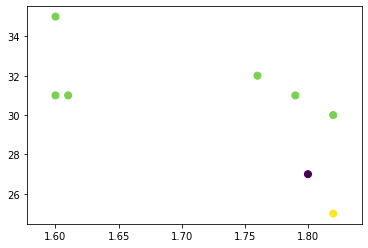

In [284]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=8).fit(datos)
labels=gmm.predict(datosvaltests)
plt.scatter(datosvaltests["Estatura"], datosvaltests["Edad"], c=labels, s=50, cmap="viridis")

In [282]:
probabilidades=gmm.predict_proba(datos)
print(probabilidades[:5].round(2))

[[0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.74 0.   0.   0.   0.26 0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.  ]]


In [312]:
probabilidades2=gmm.predict_proba(datosvaltests)
print(probabilidades2[:5].round(2))

[[0.   0.09 0.   0.   0.   0.   0.91 0.  ]
 [0.   0.95 0.   0.   0.   0.   0.05 0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.  ]]
